In [3]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import pylab as py

In [5]:
# reading the file
data = pd.read_csv('CollegeScorecard_Raw_Data/MERGED2011_PP.csv')

In [6]:
len(data)

7675

In [7]:
# collecting interesting fields
fields = ['INSTNM', 'md_earn_wne_p10', 'RPY_5YR_RT', 'COSTT4_A', 'GRAD_DEBT_MDN','PCTPELL', 'ADM_RATE', 'SAT_AVG_ALL',
          'UGDS', 'UGDS_WHITE', 'UGDS_BLACK', 'UGDS_ASIAN', 'UGDS_HISP']

In [8]:
# dealing with nulls
d1 = data[fields]
d1 = d1.replace('PrivacySuppressed', np.nan)
d1 = d1[pd.notnull(d1['md_earn_wne_p10'])]
d1 = d1[pd.notnull(d1['RPY_5YR_RT'])]
d1 = d1[pd.notnull(d1['COSTT4_A'])]
d1 = d1[pd.notnull(d1['GRAD_DEBT_MDN'])]

In [9]:
# checking and dealing with types
d1[['md_earn_wne_p10', 'RPY_5YR_RT', 'GRAD_DEBT_MDN']] = d1[['md_earn_wne_p10', 'RPY_5YR_RT', 'GRAD_DEBT_MDN']].astype(float)
d1.dtypes

INSTNM              object
md_earn_wne_p10    float64
RPY_5YR_RT         float64
COSTT4_A           float64
GRAD_DEBT_MDN      float64
PCTPELL            float64
ADM_RATE           float64
SAT_AVG_ALL        float64
UGDS               float64
UGDS_WHITE         float64
UGDS_BLACK         float64
UGDS_ASIAN         float64
UGDS_HISP          float64
dtype: object

In [10]:
# taking a look at the highest-earning graduates
d1.sort('md_earn_wne_p10').tail(20)

INSTNM  md_earn_wne_p10  \
1884                               Kettering University            74900   
2810                                    Duke University            76700   
3412                                  Lehigh University            76800   
2739                              SUNY Maritime College            77300   
1846                    Worcester Polytechnic Institute            77600   
4137                      Washington and Lee University            77600   
3481                         University of Pennsylvania            78200   
1309                Rose-Hulman Institute of Technology            78900   
1788                     Massachusetts Maritime Academy            79500   
4428                                Stanford University            80900   
269                         California Maritime Academy            81100   
2675                   Rensselaer Polytechnic Institute            81700   
2416                    Stevens Institute of Technology            82800   
732                               Georgetown University            83300   
3486                         University of the Sciences            85800   
1764                                 Harvard University            87200   
1787              Massachusetts Institute of Technology            91600   
2462     Albany College of Pharmacy and Health Sciences           110600   
2198                       St Louis College of Pharmacy           111600   
1785  Massachusetts College of Pharmacy and Health S...           116400   

      RPY_5YR_RT  COSTT4_A  GRAD_DEBT_MDN  PCTPELL  ADM_RATE  SAT_AVG_ALL  \
1884    0.951111     44254        21500.0   0.2424    0.6410         1235   
2810    0.972778     55150         7150.0   0.1353    0.1648         1435   
3412    0.978909     52454        21250.0   0.1470    0.3337         1313   
2739    0.920213     19952        25000.0   0.2768    0.6728         1065   
1846    0.971138     52111        25000.0   0.1589    0.5672          NaN   
4137    0.954128     53082        19250.0   0.0785    0.1822         1379   
3481    0.966728     55250        19125.0   0.1309    0.1243         1435   
1309    0.982993     51427        25000.0   0.2059    0.6224         1302   
1788    0.899054     24262        24675.0   0.1758    0.6281         1047   
4428    0.973131     55918        11145.5   0.1787    0.0710         1446   
269     0.914894     20707        24000.0   0.3415    0.6907         1065   
2675    0.967505     54035        25000.0   0.1840    0.3963         1344   
2416    0.944559     53661        24000.0   0.2461    0.4167         1285   
732     0.975293     56485        17500.0   0.1313    0.2015         1396   
3486    0.954945     46324        26625.0   0.2738    0.6435         1186   
1764    0.944186     53950         6000.0   0.1065    0.0626         1485   
1787    0.978686     53210        14003.0   0.1991    0.0973         1490   
2462    0.970803     37807        19800.0   0.1959    0.6409         1175   
2198    0.966057     36463        11625.0      NaN       NaN          NaN   
1785    0.972222     40719        22750.0   0.3472    0.7956         1098   

       UGDS  UGDS_WHITE  UGDS_BLACK  UGDS_ASIAN  UGDS_HISP  
1884   1684      0.7844      0.0362      0.0232     0.0285  
2810   6534      0.4686      0.0975      0.2094     0.0660  
3412   4851      0.6978      0.0355      0.0623     0.0759  
2739   1638      0.6929      0.0446      0.0348     0.0757  
1846   3746      0.6855      0.0272      0.0537     0.0750  
4137   1788      0.8428      0.0296      0.0274     0.0252  
3481  10720      0.4618      0.0735      0.1790     0.0793  
1309   1893      0.8130      0.0238      0.0349     0.0280  
1788   1269      0.9173      0.0189      0.0189     0.0221  
4428   6927      0.3645      0.0732      0.1815     0.1660  
269     881      0.5982      0.0375      0.0738     0.1294  
2675   5240      0.7071      0.0229      0.1000     0.0595  
2416   2421      0.5816      0.0285      

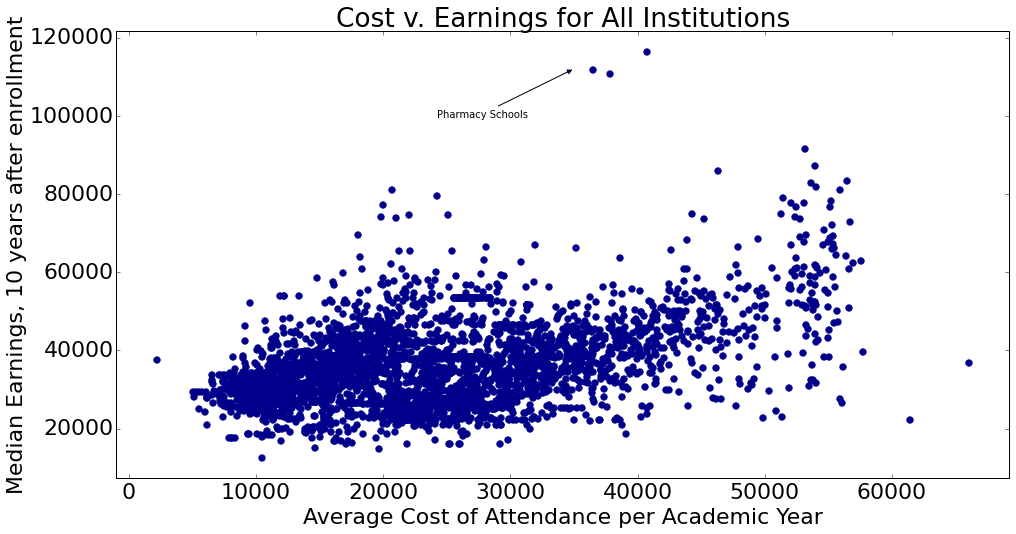

In [11]:
# plotting cost of attendance versus median earnings 10 years after enrollment
# also testing functions like annotate() and savefig()
plt.figure(figsize=[16, 8])
plt.scatter(d1['COSTT4_A'], d1['md_earn_wne_p10'], s=40, color='darkblue')
plt.ylabel('Median Earnings, 10 years after enrollment')
plt.xlabel('Average Cost of Attendance per Academic Year')
plt.axis('tight')
plt.title('Cost v. Earnings for All Institutions')
plt.annotate('Pharmacy Schools', xy=(.565, .87), xytext=(.43, .78), xycoords=('figure fraction'), textcoords=('figure fraction'), arrowprops=dict(arrowstyle="-|>"))
plt.rcParams.update({'font.size': 22})
#plt.savefig('cost_v_earnings_all.svg', format='svg')

In [21]:
def racial_breakdown(df):
    return '% black: ' + str(df.UGDS_BLACK.mean()), '% white: ' + str(df.UGDS_WHITE.mean()), '% hispanic: ' +  str(df.UGDS_HISP.mean()), '% asian: ' + str(df.UGDS_ASIAN.mean())
racial_breakdown(d1)

('% black: 0.173939982451',
 '% white: 0.566124597836',
 '% hispanic: 0.112876923077',
 '% asian: 0.0312678853466')

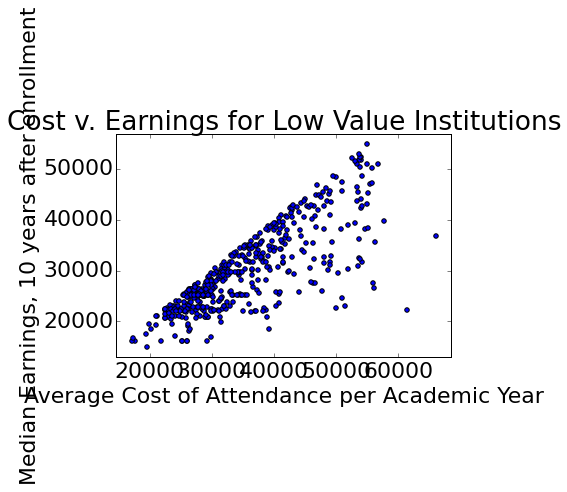

In [22]:
# bad value institutions, with a cost of attendance higher than median earnings 10 years after enrollment
bv = d1[d1['COSTT4_A']>d1['md_earn_wne_p10']]
bv.plot(x='COSTT4_A', y='md_earn_wne_p10', kind='scatter')
plt.ylabel('Median Earnings, 10 years after enrollment')
plt.xlabel('Average Cost of Attendance per Academic Year')
plt.axis('tight')
plt.title('Cost v. Earnings for Low Value Institutions')

In [23]:
bv

INSTNM  md_earn_wne_p10  \
13                          South University-Montgomery            29800   
69                              Everest College-Phoenix            28300   
70                                      Collins College            25200   
86           Southwest University of Visual Arts-Tucson            27500   
89                          Brown Mackie College-Tucson            25200   
123                                    Prescott College            35200   
166                                     Hendrix College            40500   
183                            University of the Ozarks            31100   
207       American Academy of Dramatic Arts-Los Angeles            30200   
216                        Art Center College of Design            51700   
225                                    Biola University            40700   
226                                    Brooks Institute            29100   
234                      California College of the Arts            35700   
268                    California Institute of the Arts            32500   
286                                  Chapman University            51800   
289                         San Diego Christian College            34400   
321                  Dominican University of California            51400   
334   FIDM/Fashion Institute of Design & Merchandisi...            34500   
335                             Fashion Careers College            30400   
336   FIDM/Fashion Institute of Design & Merchandisi...            34500   
337   FIDM/Fashion Institute of Design & Merchandisi...            34500   
424                                   Marymount College            32600   
429                                       Mills College            39000   
444                                 Musicians Institute            26100   
447                              Everest College-Reseda            29500   
448                         Everest College-LA Wilshire            25800   
452                      Everest College-San Bernardino            24500   
463                                  Occidental College            50100   
467                      Otis College of Art and Design            42000   
469                       Hope International University            35100   
...                                                 ...              ...   
6762                       Brown Mackie College-Phoenix            25200   
6774                    Brown Mackie College-Greenville            25200   
6778                       Globe University-Minneapolis            31100   
6793                          National College-Columbus            22400   
6916          Dorsey Business Schools-Waterford Pontiac            22800   
6923                  National University College-Ponce            16700   
6926                The Art Institute of Virginia Beach            31600   
6928                              Daymar College-Online            22100   
6938                        Fortis College-Indianapolis            20900   
6942                      Globe University-Madison East            31100   
6962                         Globe University-La Crosse            31100   
6986                          South University–Richmond            29800   
6987                    South University–Virginia Beach            29800   
7036                  National College-Willoughby Hills            22000   
7055                   Brown Mackie College-Albuquerque            25200   
7059              Ross Medical Education Center-Davison            22200   
7060              Ross Medical Education Center-Granger            24600   
7061                Ross Medical Education Center-Niles            23000   
7062               Ross Medical Education Center-Canton            19900   
7071                   Everest College-Fort Worth South            24700   
7077                          Daymar College-Louisville            22100   
7078                 

In [24]:
# good value institutions, with a median earnings 3 times higher than the cost of attendance and median earnings 
# over $40,000
gv = d1[(d1['COSTT4_A']*3 < d1['md_earn_wne_p10']) & (d1['md_earn_wne_p10'] > 40000)]
gv.sort('md_earn_wne_p10')

INSTNM  md_earn_wne_p10  \
2353                           County College of Morris            40200   
4200                        Shoreline Community College            40500   
3908               The University of Texas-Pan American            40500   
1685                                 Montgomery College            40500   
4145                                   Bellevue College            41300   
2926              North Dakota State College of Science            41400   
2538                                CUNY Lehman College            41500   
2530                      CUNY College of Staten Island            41600   
4092                Northern Virginia Community College            41700   
67               Prince William Sound Community College            42000   
1014                     University of Hawaii-West Oahu            42300   
4020                             Weber State University            42400   
3965       The University of Texas of the Permian Basin            42400   
245         California State University-Dominguez Hills            42800   
6233  Shorter University-College of Adult & Professi...            43000   
2535          CUNY John Jay College of Criminal Justice            43700   
4248  Potomac State College of West Virginia University            43900   
4258   West Virginia University Institute of Technology            43900   
2531                                  CUNY City College            44500   
2529                              CUNY Brooklyn College            44500   
2534                                CUNY Hunter College            44800   
250             California State University-Los Angeles            44900   
3874               Texas A & M International University            45200   
2716                          Farmingdale State College            45600   
3099            Trinity Health System School of Nursing            46300   
247               California State University-Fullerton            46500   
4938                College of Biblical Studies-Houston            46700   
1915                    University of Michigan-Dearborn            47400   
343                                    Foothill College            47600   
2691               Samaritan Hospital School of Nursing            47800   
...                                                 ...              ...   
5769                      Lamar Institute of Technology            48200   
1677          University of Maryland-University College            50700   
243      California State Polytechnic University-Pomona            52000   
4825             University of Washington-Tacoma Campus            52100   
4824            University of Washington-Bothell Campus            52100   
2247                                Bellevue University            52200   
989               Southern Polytechnic State University            52400   
2439      New Mexico Institute of Mining and Technology            52800   
3953                   Texas A & M University-Galveston            52900   
5545               University of Connecticut-Tri-Campus            53900   
5546              University of Connecticut-Avery Point            53900   
5547                 University of Connecticut-Stamford            53900   
2526                      CUNY Bernard M Baruch College            54000   
2405                          Rutgers University-Camden            54800   
5203     Veeb Nassau County School of Practical Nursing            56600   
3993                     Brigham Young University-Provo            57400   
2524                 Crouse Hospital College of Nursing            58500   
3370                      Aria Health School of Nursing            59900   
5348     Embry-Riddle Aeronautical University-Worldwide            60900   
4106            Bon Secours Memorial College of Nursing            62200   
704                                St Vincent's College            64000   
2170      Missouri Un

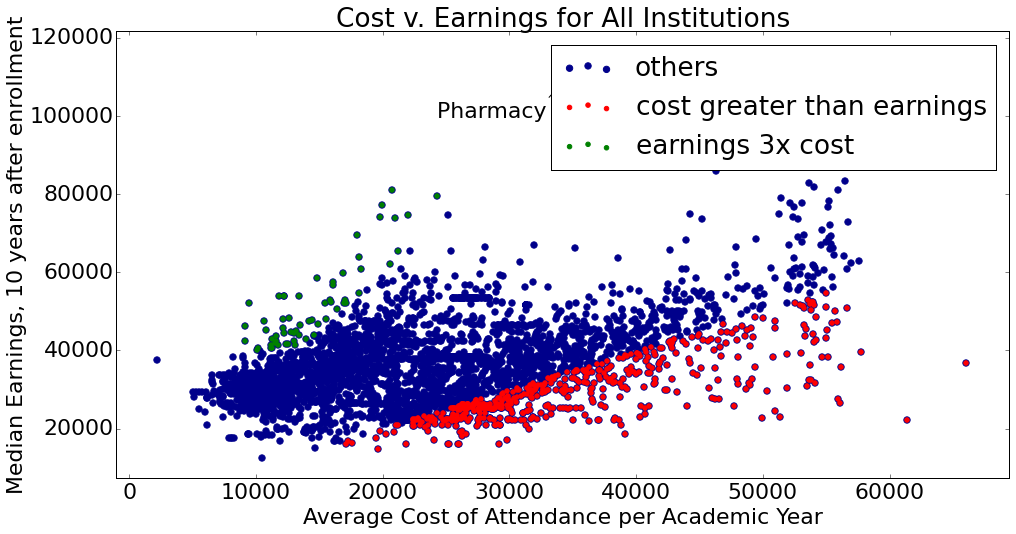

In [25]:
plt.figure(figsize=[16, 8])
plt.scatter(d1['COSTT4_A'], d1['md_earn_wne_p10'], s=40, color='darkblue')
plt.scatter(bv['COSTT4_A'], bv['md_earn_wne_p10'], color='red', label='cost greater than earnings')
plt.scatter(gv['COSTT4_A'], gv['md_earn_wne_p10'], color='green')
plt.ylabel('Median Earnings, 10 years after enrollment')
plt.xlabel('Average Cost of Attendance per Academic Year')
plt.axis('tight')
plt.title('Cost v. Earnings for All Institutions')
plt.legend(['others', 'cost greater than earnings', 'earnings 3x cost'])
plt.annotate('Pharmacy Schools', xy=(.565, .87), xytext=(.43, .78), xycoords=('figure fraction'), textcoords=('figure fraction'), arrowprops=dict(arrowstyle="-|>"))

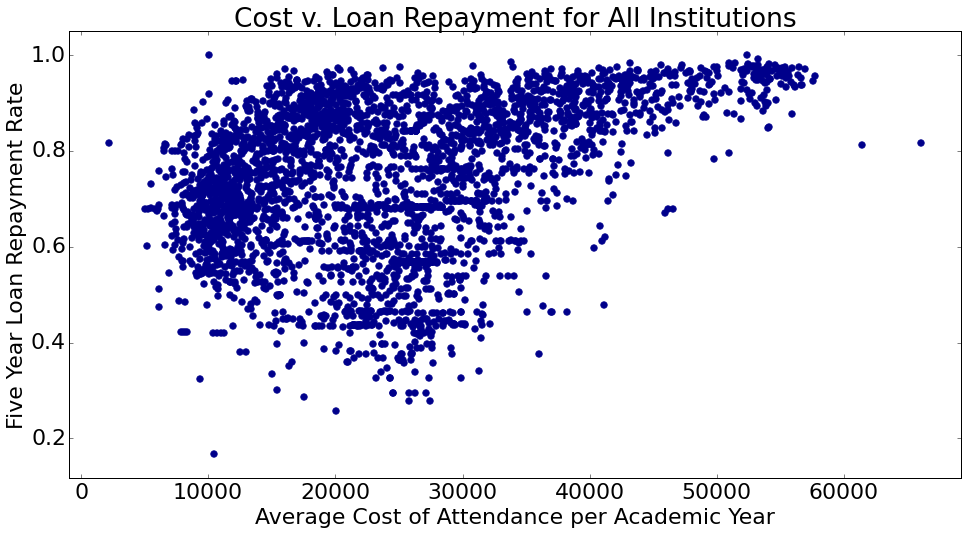

In [26]:
# cost of attendance vs. 5 year repayment rate on student loans
plt.figure(figsize=[16, 8])
plt.scatter(d1['COSTT4_A'], d1['RPY_5YR_RT'], s=40, color='darkblue')
plt.ylabel('Five Year Loan Repayment Rate')
plt.xlabel('Average Cost of Attendance per Academic Year')
plt.axis('tight')
plt.title('Cost v. Loan Repayment for All Institutions')

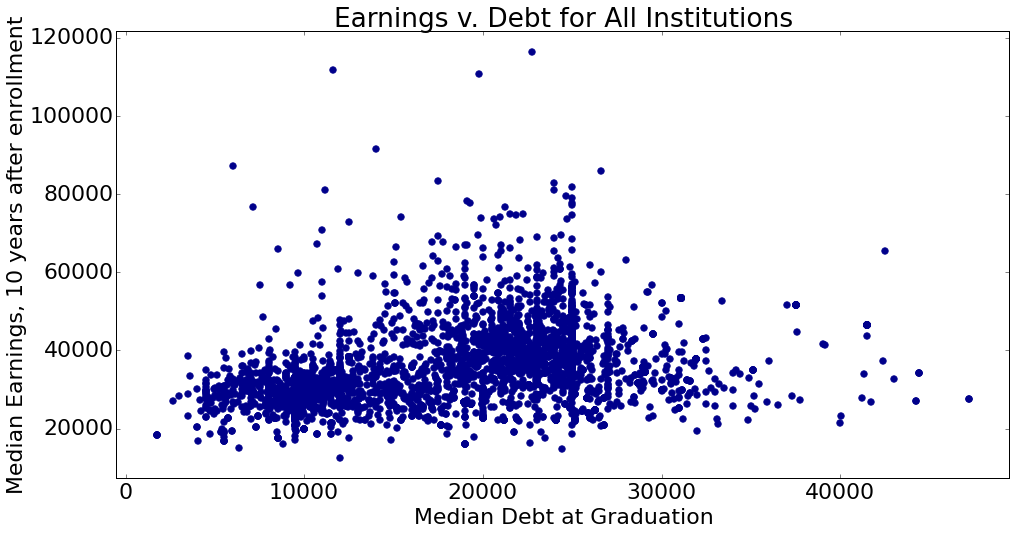

In [27]:
# debt at graduation versus median earnings 10 years after enrollment
plt.figure(figsize=[16, 8])
plt.scatter(d1['GRAD_DEBT_MDN'], d1['md_earn_wne_p10'], s=40, color='darkblue')
plt.ylabel('Median Earnings, 10 years after enrollment')
plt.xlabel('Median Debt at Graduation')
plt.axis('tight')
plt.title('Earnings v. Debt for All Institutions')
plt.rcParams.update({'font.size': 22})

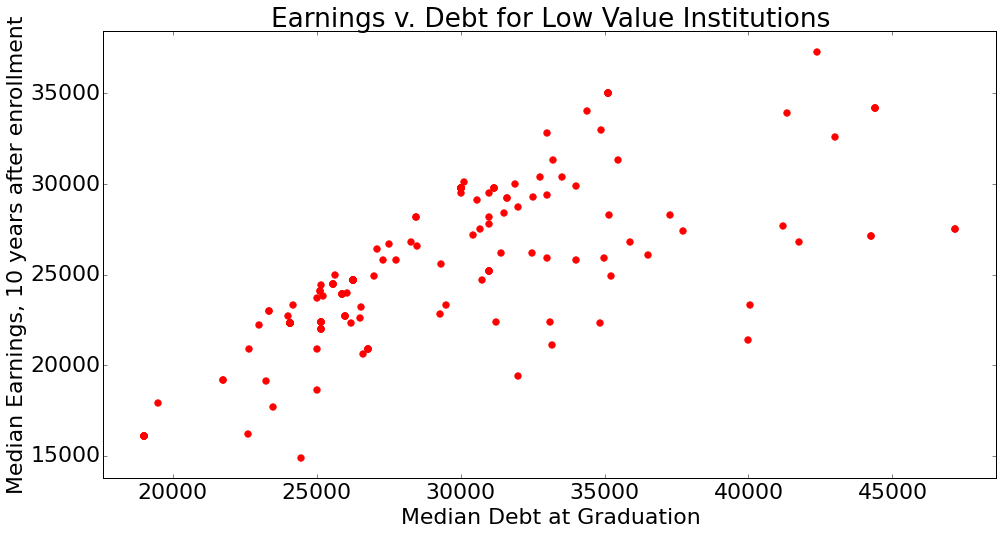

In [28]:
# bad value schools with negative debt to earnings
badvalue = d1[d1['GRAD_DEBT_MDN']>d1['md_earn_wne_p10']]
plt.figure(figsize=[16, 8])
plt.scatter(badvalue['GRAD_DEBT_MDN'], badvalue['md_earn_wne_p10'], s=40, color='red')
plt.ylabel('Median Earnings, 10 years after enrollment')
plt.xlabel('Median Debt at Graduation')
plt.axis('tight')
plt.title('Earnings v. Debt for Low Value Institutions')

In [29]:
badvalue

INSTNM  md_earn_wne_p10  \
4                              Alabama State University            27800   
13                          South University-Montgomery            29800   
35                                        Miles College            27200   
53                                     Stillman College            24700   
70                                      Collins College            25200   
86           Southwest University of Visual Arts-Tucson            27500   
139                            Arkansas Baptist College            21100   
185                             Philander Smith College            26200   
226                                    Brooks Institute            29100   
318                       Design Institute of San Diego            33900   
371     Humphreys College-Stockton and Modesto Campuses            31300   
490                          Westwood College-South Bay            34200   
619                       Westwood College-Denver North            35000   
632                                   Naropa University            18600   
669                                     Goodwin College            25800   
740                The Art Institute of Fort Lauderdale            29500   
745                          Bethune-Cookman University            28700   
761                    South University-West Palm Beach            29800   
764                               Edward Waters College            25600   
779                         Florida Memorial University            27700   
801   AI Miami International University of Art and D...            29300   
805                          Jones College-Jacksonville            28300   
872   Stenotype Institute of Jacksonville Inc-Jackso...            27100   
919                                      Bauder College            24400   
922                           Beulah Heights University            26800   
938                           South University-Savannah            29800   
977                                       Paine College            25900   
1035                            American Academy of Art            26700   
1114  International Academy of Design and Technology...            25200   
1151                                   Midstate College            25900   
...                                                 ...              ...   
5917                     Westwood College-Houston South            35000   
5991                   Westwood College-Atlanta Midtown            29800   
5995  International Academy of Design and Technology...            25200   
6125  International Academy of Design and Technology...            25200   
6129                Career Technical College-Shreveport            19200   
6139                Westwood College-Arlington Ballston            34200   
6152                           AmeriTech College-Draper            23800   
6163                         Harrison College-Northwest            24700   
6260                         Westwood College-Annandale            34200   
6350                             South University-Tampa            29800   
6388                           Harrison College-Elkhart            24700   
6501    The Art Institute of Pittsburgh-Online Division            29200   
6508              Bryant and Stratton College-Wauwatosa            22300   
6532                The Art Institute of Raleigh-Durham            28200   
6552                            National College-Dayton            22400   
6553                        National College-Youngstown            22400   
6554                        National College-Cincinnati            22400   
6555                              National College-Stow            22000   
6585                               Bryan College-Rogers            24100   
6735               Lincoln College of Technology-Toledo            16100   
6793                          National College-Columbus            22400   
6921                 

In [30]:
racial_breakdown(badvalue)

('% black: 0.425988439306',
 '% white: 0.394048554913',
 '% hispanic: 0.070550867052',
 '% asian: 0.0115514450867')

In [31]:
# which schools are a bad investment?
badvalue['net'] = (badvalue['md_earn_wne_p10']-badvalue['GRAD_DEBT_MDN'])
badvalue.sort('net')

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


INSTNM  md_earn_wne_p10  \
4980    Southwest University of Visual Arts-Albuquerque            27500   
86           Southwest University of Visual Arts-Tucson            27500   
3590                                   Benedict College            21400   
872   Stenotype Institute of Jacksonville Inc-Jackso...            27100   
5825    Stenotype Institute of Jacksonville Inc-Orlando            27100   
1229                     College of Court Reporting Inc            23300   
922                           Beulah Heights University            26800   
779                         Florida Memorial University            27700   
3586                                   Allen University            19400   
1294                                  Martin University            22300   
139                            Arkansas Baptist College            21100   
3716                                      South College            22400   
2838                                Livingstone College            26100   
4537                               Platt College-Aurora            32600   
2886                                    Shaw University            27400   
2971                           Central State University            24900   
6139                Westwood College-Arlington Ballston            34200   
6260                         Westwood College-Annandale            34200   
490                          Westwood College-South Bay            34200   
4243                             Mountain State College            14900   
1909                                  Marygrove College            26800   
977                                       Paine College            25900   
805                          Jones College-Jacksonville            28300   
2079                Mississippi Valley State University            22400   
669                                     Goodwin College            25800   
318                       Design Institute of San Diego            33900   
1151                                   Midstate College            25900   
1565                         Grambling State University            28300   
1183                            Rockford Career College            22800   
3116                          Gallipolis Career College            16200   
...                                                 ...              ...   
3962                                      Texas College            23300   
3651                           Kilian Community College            22200   
1035                            American Academy of Art            26700   
919                                      Bauder College            24400   
3643                                   Voorhees College            26400   
3718                                       Lane College            25000   
740                The Art Institute of Fort Lauderdale            29500   
1563                                 Dillard University            34000   
5677                      Everest College-Ontario Metro            23000   
2191                        Everest College-Springfield            23000   
6532                The Art Institute of Raleigh-Durham            28200   
2780                     The Art Institute of Charlotte            28200   
13                          South University-Montgomery            29800   
7295   South University-The Art Institute of Fort Worth            29800   
7296                              South University-Novi            29800   
6987                    South University–Virginia Beach            29800   
6986                          South University–Richmond            29800   
3601                                      Coker College            32800   
3841       South University-The Art Institute of Dallas            29800   
4528                          South University-Columbia            29800   
938                           South University-Savannah            29800   
761                  

In [32]:
# which schools are the worst investment?
zone_of_debt = badvalue[badvalue.net < -10000]
racial_breakdown(zone_of_debt), len(zone_of_debt)

(('% black: 0.544768421053',
  '% white: 0.264705263158',
  '% hispanic: 0.110836842105',
  '% asian: 0.0171210526316'),
 19)

In [33]:
zone_of_debt.sort('net')

INSTNM  md_earn_wne_p10  \
86           Southwest University of Visual Arts-Tucson            27500   
4980    Southwest University of Visual Arts-Albuquerque            27500   
3590                                   Benedict College            21400   
5825    Stenotype Institute of Jacksonville Inc-Orlando            27100   
872   Stenotype Institute of Jacksonville Inc-Jackso...            27100   
1229                     College of Court Reporting Inc            23300   
922                           Beulah Heights University            26800   
779                         Florida Memorial University            27700   
3586                                   Allen University            19400   
1294                                  Martin University            22300   
139                            Arkansas Baptist College            21100   
3716                                      South College            22400   
2838                                Livingstone College            26100   
4537                               Platt College-Aurora            32600   
2886                                    Shaw University            27400   
2971                           Central State University            24900   
6139                Westwood College-Arlington Ballston            34200   
490                          Westwood College-South Bay            34200   
6260                         Westwood College-Annandale            34200   

      RPY_5YR_RT  COSTT4_A  GRAD_DEBT_MDN  PCTPELL  ADM_RATE  SAT_AVG_ALL  \
86      0.677507     46183        47186.5   0.2452       NaN          NaN   
4980    0.677507     46544        47186.5   0.2055       NaN          NaN   
3590    0.422454     27620        40000.0   0.8722       NaN          NaN   
5825    0.658281     29393        44260.0   0.4737       NaN          NaN   
872     0.658281     30122        44260.0   0.6537       NaN          NaN   
1229    0.825301     14518        40050.0   0.4500       NaN          NaN   
922     0.583618     11105        41750.0   0.0889       NaN          NaN   
779     0.493536     23611        41213.0   0.7824    0.3323          NaN   
3586    0.446188     19831        31980.0   0.8974       NaN          NaN   
1294    0.595937     21250        34860.0   0.7888       NaN          NaN   
139     0.256410     20015        33179.0   0.7945       NaN          NaN   
3716    0.528684     31676        33110.0   0.6527       NaN          NaN   
2838    0.445687     24000        36500.0   0.8910    0.5387          743   
4537    0.736842     41487        43000.0   0.5538    1.0000          NaN   
2886    0.506944     24269        37737.0   0.7741    0.4772          NaN   
2971    0.451961     16288        35218.5   0.8048    0.3227          761   
6139    0.438525     29361        44404.5   0.7905    0.5444          NaN   
490     0.438525     29329        44404.5   0.8753    0.5309          NaN   
6260    0.438525     29306        44404.5   0.6648    0.5817          NaN   

      UGDS  UGDS_WHITE  UGDS_BLACK  UGDS_ASIAN  UGDS_HISP      net  
86     254      0.5630      0.0433      0.0118     0.3425 -19686.5  
4980   261      0.3985      0.0345      0.0230     0.4291 -19686.5  
3590  3203      0.0037      0.9866      0.0006     0.0031 -18600.0  
5825   152      0.6184      0.1579      0.0066     0.2171 -17160.0  
872    203      0.6453      0.2906      0.0049     0.0493 -17160.0  
1229   240      0.7292      0.1208      0.0125     0.0708 -16750.0  
922    640      0.0734      0.6359      0.0906     0.0016 -14950.0  
779   1694      0.0018      0.8347      0.0006     0.0248 -13513.0  
3586   644      0.0047      0.9938      0.0000     0.0016 -12580.0  
1294   903      0.0332      0.9324      0.0000     0.0078 -12560.0  
139   1189      0.0345      0.9529      0.0008     0.0008 -12079.0  
3716   810      0.8802      0.0741      0.0148     0.0160 -10710.0  
2838  1140      0.0079      0.9325      0.0000     0.0061 -10400.0  
4537   196      0.775

In [34]:
# exporting zone of debt table
zod = zone_of_debt[['INSTNM', 'md_earn_wne_p10', 'COSTT4_A', 'GRAD_DEBT_MDN']]
zod.columns = ['Name', 'Median Earnings After 10yrs', 'Cost: Academic Year', 'Median Debt at Graduation']
zod = zod.sort('Name')
#zod.to_csv('zone_of_debt.csv')

In [35]:
# good value schools, with high earnings, low debt, and high average SAT scores
goodvalue = d1[(d1['GRAD_DEBT_MDN']*3 < d1['md_earn_wne_p10']) & (d1['md_earn_wne_p10'] > 40000) & 
               (d1['SAT_AVG_ALL'] > 1250)]
goodvalue['net'] = (goodvalue['md_earn_wne_p10']-goodvalue['GRAD_DEBT_MDN'])
goodvalue.sort('ADM_RATE')

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


INSTNM  md_earn_wne_p10  \
1764                            Harvard University            87200   
4428                           Stanford University            80900   
713                                Yale University            66000   
3567                              Brown University            59700   
2513   Columbia University in the City of New York            72900   
1787         Massachusetts Institute of Technology            91600   
2301                             Dartmouth College            67100   
3481                    University of Pennsylvania            78200   
236             California Institute of Technology            74000   
1618                               Bowdoin College            54800   
1064                         University of Chicago            62800   
3777                         Vanderbilt University            60900   
2810                               Duke University            76700   
2215             Washington University in St Louis            62300   
2521                            Cornell University            70900   
4137                 Washington and Lee University            77600   
3916                               Rice University            59900   
1672                      Johns Hopkins University            69200   
732                          Georgetown University            83300   
253              University of California-Berkeley            62700   
1838                              Tufts University            67800   
561              University of Southern California            66100   
1167                       Northwestern University            64100   
1301                      University of Notre Dame            69400   
256           University of California-Los Angeles            59200   
2567                              Hamilton College            57300   
1730                                Boston College            67000   
941                               Emory University            59000   
2511                            Colgate University            61500   
1621                                 Colby College            53000   
3327                    Carnegie Mellon University            72000   
1839                             Wellesley College            56700   
731                   George Washington University            64500   
4107                        University of Richmond            60800   
4129            University of Virginia-Main Campus            58600   
3412                             Lehigh University            76800   
2859   University of North Carolina at Chapel Hill            50400   
4050                   College of William and Mary            56400   
258             University of California-San Diego            59600   
2675              Rensselaer Polytechnic Institute            81700   
2719                            SUNY at Binghamton            58400   
2416               Stevens Institute of Technology            82800   
607                       Colorado School of Mines            74700   
1680           University of Maryland-College Park            59100   
1349                              Grinnell College            45600   
2967               Case Western Reserve University            67000   
945    Georgia Institute of Technology-Main Campus            74000   
531                         Santa Clara University            67700   
1309           Rose-Hulman Institute of Technology            78900   
3993                Brigham Young University-Provo            57400   
2664  Polytechnic Institute of New York University            73500   

      RPY_5YR_RT  COSTT4_A  GRAD_DEBT_MDN  PCTPELL  ADM_RATE  SAT_AVG_ALL  \
1764    0.944186     53950         6000.0   0.1065    0.0626         1485   
4428    0.973131     55918        11145.5   0.1787    0.0710         1446   
713     0.969415     55300         8500.0   0.1418    0.0788         1497   
3567    0.965296     54370        13022.0  

In [36]:
len(goodvalue)

51

In [37]:
racial_breakdown(goodvalue)

('% black: 0.0543529411765',
 '% white: 0.537309803922',
 '% hispanic: 0.0870196078431',
 '% asian: 0.150680392157')

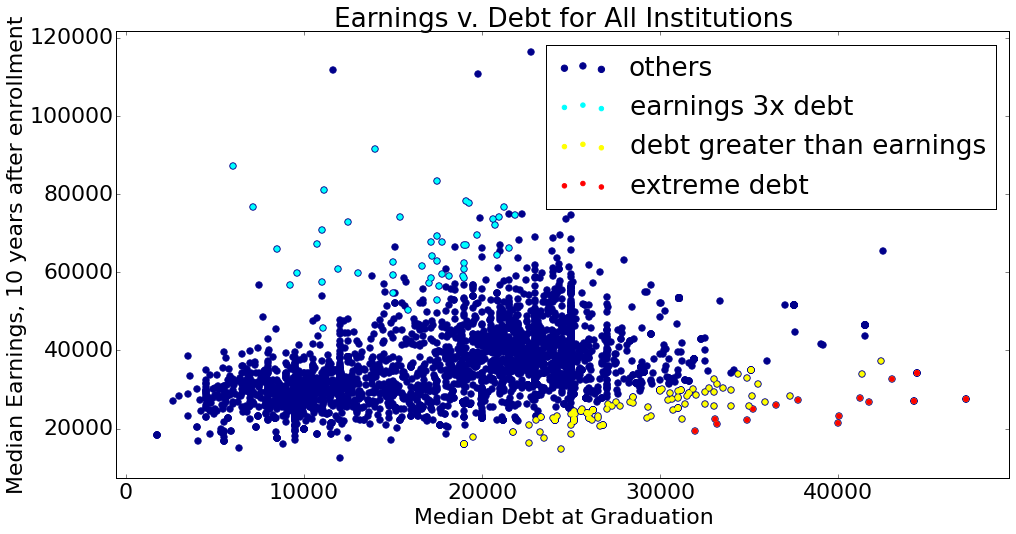

In [38]:
plt.figure(figsize=[16, 8])
plt.scatter(d1['GRAD_DEBT_MDN'], d1['md_earn_wne_p10'], s=40, color='darkblue')
plt.scatter(goodvalue['GRAD_DEBT_MDN'], goodvalue['md_earn_wne_p10'], color='cyan')
plt.scatter(badvalue['GRAD_DEBT_MDN'], badvalue['md_earn_wne_p10'], color='yellow')
plt.scatter(zone_of_debt['GRAD_DEBT_MDN'], zone_of_debt['md_earn_wne_p10'], color='red')
plt.axis('tight')
plt.ylabel('Median Earnings, 10 years after enrollment')
plt.xlabel('Median Debt at Graduation')
plt.title('Earnings v. Debt for All Institutions')
plt.legend(['others', 'earnings 3x debt', 'debt greater than earnings', 'extreme debt'])
plt.rcParams.update({'font.size': 22})
#plt.savefig('earnings_v_debt_all.svg', format='svg')

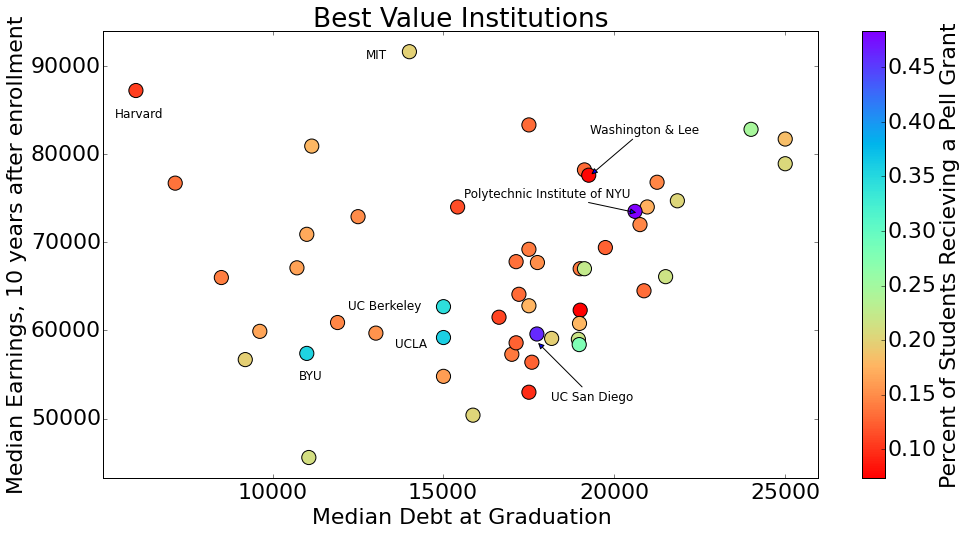

In [52]:
# shows good value schools with a high number of pell grant recipients
plt.figure(figsize=[16, 8])
plt.scatter(goodvalue['GRAD_DEBT_MDN'], goodvalue['md_earn_wne_p10'], s=200, c = goodvalue.PCTPELL, cmap = 'rainbow_r')
plt.colorbar(label='Percent of Students Recieving a Pell Grant')
plt.axis('tight')
plt.ylabel('Median Earnings, 10 years after enrollment')
plt.xlabel('Median Debt at Graduation')
plt.title('Best Value Institutions')
plt.annotate('Harvard', xy=(.09, .84), xytext=(.12, .78), xycoords=('figure fraction'), textcoords=('figure fraction'), fontsize=12)
plt.annotate('Polytechnic Institute of NYU', xy=(.66, .6), xytext=(.48, .63), xycoords=('figure fraction'), textcoords=('figure fraction'), arrowprops=dict(arrowstyle="-|>"), fontsize=12)
plt.annotate('BYU', xy=(.29, .31), xytext=(.31, .29), xycoords=('figure fraction'), textcoords=('figure fraction'), fontsize=12)
plt.annotate('UC San Diego', xy=(.555, .36), xytext=(.57, .25), xycoords=('figure fraction'), textcoords=('figure fraction'), arrowprops=dict(arrowstyle="-|>"), fontsize=12)
plt.annotate('UCLA', xy=(.29, .31), xytext=(.41, .35), xycoords=('figure fraction'), textcoords=('figure fraction'), fontsize=12)
plt.annotate('UC Berkeley', xy=(.29, .31), xytext=(.36, .42), xycoords=('figure fraction'), textcoords=('figure fraction'), fontsize=12)
plt.annotate('Washington & Lee', xy=(.61, .67), xytext=(.61, .75), xycoords=('figure fraction'), textcoords=('figure fraction'), arrowprops=dict(arrowstyle="-|>"), fontsize=12)
plt.annotate('MIT', xy=(.29, .31), xytext=(.38, .89), xycoords=('figure fraction'), textcoords=('figure fraction'), fontsize=12)
#plt.savefig('best_value_pell.png', format='png')

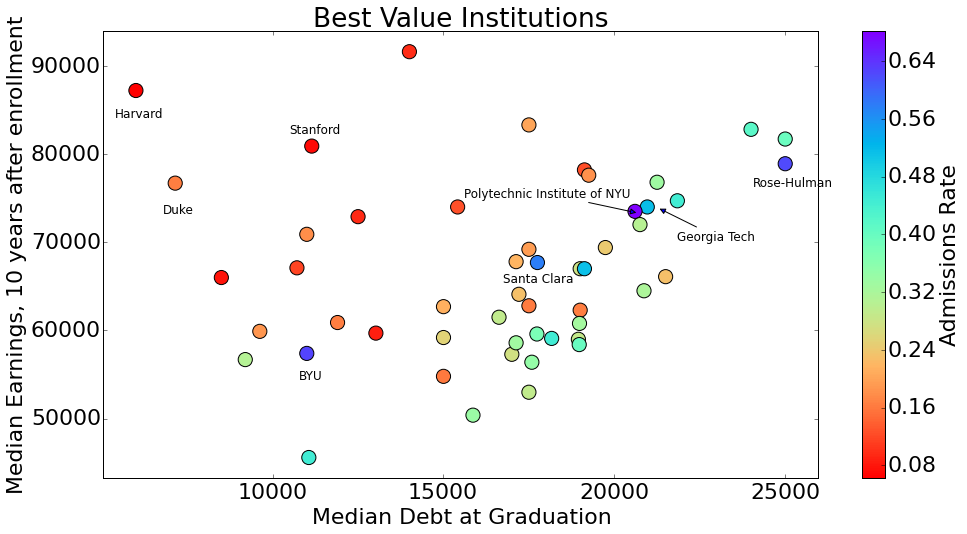

In [63]:
# good valued schools with high admissions rates
plt.figure(figsize=[16, 8])
plt.scatter(goodvalue['GRAD_DEBT_MDN'], goodvalue['md_earn_wne_p10'], s=200, c = goodvalue.ADM_RATE, cmap = 'rainbow_r')
plt.colorbar(label='Admissions Rate')
plt.axis('tight')
plt.ylabel('Median Earnings, 10 years after enrollment')
plt.xlabel('Median Debt at Graduation')
plt.title('Best Value Institutions')
plt.annotate('Harvard', xy=(.09, .84), xytext=(.12, .78), xycoords=('figure fraction'), textcoords=('figure fraction'), fontsize=12)
plt.annotate('Rose-Hulman', xy=(.84, .69), xytext=(.78, .65), xycoords=('figure fraction'), textcoords=('figure fraction'), fontsize=12)
plt.annotate('Polytechnic Institute of NYU', xy=(.66, .6), xytext=(.48, .63), xycoords=('figure fraction'), textcoords=('figure fraction'), arrowprops=dict(arrowstyle="-|>"), fontsize=12)
plt.annotate('BYU', xy=(.29, .31), xytext=(.31, .29), xycoords=('figure fraction'), textcoords=('figure fraction'), fontsize=12)
plt.annotate('Santa Clara', xy=(.55, .55), xytext=(.52, .47), xycoords=('figure fraction'), textcoords=('figure fraction'), fontsize=12)
plt.annotate('Georgia Tech', xy=(.68, .61), xytext=(.70, .55), xycoords=('figure fraction'), textcoords=('figure fraction'), arrowprops=dict(arrowstyle="-|>"), fontsize=12)
plt.annotate('Stanford', xy=(.29, .73), xytext=(.3, .75), xycoords=('figure fraction'), textcoords=('figure fraction'), fontsize=12)
plt.annotate('Duke', xy=(.25, .65), xytext=(.17, .60), xycoords=('figure fraction'), textcoords=('figure fraction'), fontsize=12)
#plt.savefig('best_value_adm.svg', format='svg')

In [41]:
# exporting good value table
gvp = goodvalue[['INSTNM', 'md_earn_wne_p10', 'COSTT4_A', 'GRAD_DEBT_MDN', 'PCTPELL', 'ADM_RATE']]
gvp.columns = ['Name', 'Median Earnings After 10yrs', 'Cost: Academic Year', 'Median Debt at Graduation',
               '% Pell Recipients', 'Admissions Rate']
gvp = gvp.sort('Name')
#gvp.to_csv('goodvalue.csv')